In [5]:
import numpy as np

In [6]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

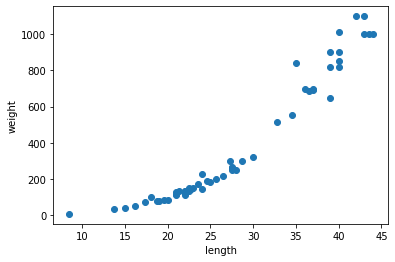

In [7]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)

In [9]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [12]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [13]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
print(x_train.shape, x_test.shape)

(42, 1) (14, 1)


In [14]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(x_train, y_train)

KNeighborsRegressor()

In [15]:
print(knr.score(x_test, y_test))

0.992809406101064


In [16]:
from sklearn.metrics import mean_absolute_error

y_pred = knr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print(mae)

19.157142857142862


In [21]:
print(knr.score(x_train, y_train))

0.9698823289099254


In [22]:
knr.n_neighbors=3

knr.fit(x_train, y_train)
print(knr.score(x_train, y_train))

0.9804899950518966


In [23]:
print(knr.score(x_test, y_test))

0.9746459963987609


In [24]:
print(knr.predict([[50]]))

[1033.33333333]


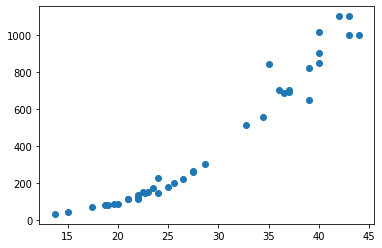

In [25]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(x_train, y_train)

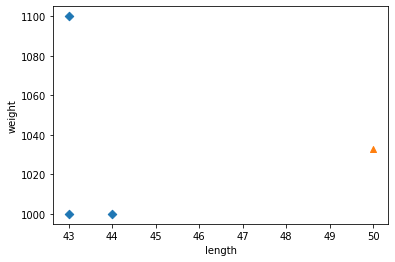

In [26]:
plt.scatter(x_train[indexes], y_train[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)

print(lr.predict([[50]]))


[1241.83860323]


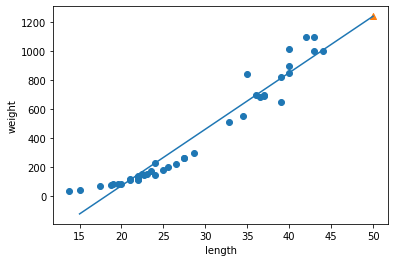

In [28]:
plt.scatter(x_train, y_train)

plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.9398463339976041
0.824750312331356


In [34]:
train_poly = np.column_stack((x_train ** 2, x_train))
test_poly = np.column_stack((x_test ** 2, x_test))

In [35]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [36]:
lr = LinearRegression()
lr.fit(train_poly, y_train)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [37]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


In [38]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [39]:
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(perch_full, perch_weight, random_state=42)

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [43]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [44]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(x_train)
train_poly = poly.transform(x_train)
print(train_poly.shape)

(42, 9)


In [45]:
poly.get_feature_names()

c:\Users\eofhr\OneDrive\바탕 화면\Programming\Python 연습\AIFFEL\python_practice\python_practice\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [46]:
test_poly = poly.transform(x_test)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, y_train)
print(lr.score(train_poly, y_train))

0.9903183436982124


In [49]:
print(lr.score(test_poly, y_test))

0.9714559911594199


In [50]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(x_train)
train_poly = poly.transform(x_train)
test_poly = poly.transform(x_test)
print(train_poly.shape)

(42, 55)
